# Introduction

This case study is the Capstone Project of Google Data Analytics Professional Certificate . In this case study I am working as a junior data analyst in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago.

# Scenario
I'm a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## Characters and teams
### Cyclistic: 
A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
### Lily Moreno: 
The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
### Cyclistic marketing analytics team: 
A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
### Cyclistic executive team: 
The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.
## About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

# Ask
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

# Ask
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

# Process
I imported key Python libraries.

In [ ]:
pip install plotly

In [ ]:
pip install cufflinks

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf

I checked the files.

In [2]:
import os, sys
path = '/Users/SonaSolarova/Documents/STUDIUM/Google_Certificate/8_Capstone_Case Study/case_study_Cyclistic/unpacked_data/08_2021_07_2022'
dirs = os.listdir(path)
for file in dirs: print(file)

202205-divvy-tripdata.csv
202109-divvy-tripdata.csv
.DS_Store
202206-divvy-tripdata.csv
202111-divvy-tripdata.csv
202112-divvy-tripdata.csv
202203-divvy-tripdata.csv
202202-divvy-tripdata.csv
202201-divvy-tripdata.csv
202110-divvy-tripdata.csv
202207-divvy-tripdata.csv
202204-divvy-tripdata.csv
202108-divvy-tripdata.csv


I imported the files from local disc.

In [3]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join('/Users/SonaSolarova/Documents/STUDIUM/Google_Certificate/8_Capstone_Case Study/case_study_Cyclistic/unpacked_data/08_2021_07_2022', '*-divvy-tripdata.csv')

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files
                  ride_id  rideable_type           started_at  \
0        EC2DE40644C6B0F4   classic_bike  2022-05-23 23:06:58   
1        1C31AD03897EE385   classic_bike  2022-05-11 08:53:28   
2        1542FBEC830415CF   classic_bike  2022-05-26 18:36:28   
3        6FF59852924528F8   classic_bike  2022-05-10 07:30:07   
4        483C52CAAE12E3AC   classic_bike  2022-05-10 17:31:56   
...                   ...            ...                  ...   
5901458  5E5C9CD681E0419C   classic_bike  2021-08-07 18:07:43   
5901459  96FB57CF4AA456F6  electric_bike  2021-08-09 08:49:31   
5901460  226A0910DCCE904C   classic_bike  2021-08-12 16:55:57   
5901461  1A97D27AE23DE1E7   classic_bike  2021-08-08 22:47:43   
5901462  BBC36E4AA3652361  electric_bike  2021-08-27 18:53:53   

                    ended_at                 start_station_name  \
0        2022-05-23 23:40:19             Wabash Ave & Grand Ave   
1        2022-05-11 09:31:22  DuSable Lake 

## Cleaning process

1) to count number of distinct elements in specified axis.

In [4]:
df['start_station_name'].nunique()

1381

In [5]:
df['end_station_name'].nunique()

1396

In [6]:
df['start_station_id'].nunique()

1226

In [7]:
df['end_station_id'].nunique()

1236

In [8]:
df['ride_id'].nunique()

5901463

2) To check for formatting

In [9]:
df['member_casual'].value_counts()

member    3379237
casual    2522226
Name: member_casual, dtype: int64

In [10]:
df.groupby('start_station_id').sum()

,start_lat,start_lng,end_lat,end_lng
start_station_id,,,,
021320,5864.600000,-12275.200000,5866.000309,-12274.513330
1011,1718.720000,-3599.390000,1718.900000,-3598.960000
1012,209.010000,-438.050000,209.034982,-438.073124
1013,293.230000,-614.110000,293.254603,-614.056304
1016,41.990000,-87.720000,41.980000,-87.690000
...,...,...,...,...
chargingstx0,2306.283185,-4820.899030,2306.010169,-4820.865661
chargingstx1,215544.266579,-450707.638204,215423.287349,-450431.630513
chargingstx3,239783.565701,-501788.148789,239789.982280,-501674.348830


3) To delete columns which I won't work in my analysis with.

In [11]:
df = df.drop(columns=['start_lat','start_lng','end_lat','end_lng'])
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
5901458,5E5C9CD681E0419C,classic_bike,2021-08-07 18:07:43,2021-08-07 18:21:21,Wells St & Evergreen Ave,TA1308000049,Lincoln Ave & Diversey Pkwy,TA1307000064,member
5901459,96FB57CF4AA456F6,electric_bike,2021-08-09 08:49:31,2021-08-09 09:03:51,Broadway & Sheridan Rd,13323,Clark St & Lincoln Ave,13179,member
5901460,226A0910DCCE904C,classic_bike,2021-08-12 16:55:57,2021-08-12 17:15:10,Dearborn St & Adams St,TA1305000005,Clark St & Lincoln Ave,13179,member
5901461,1A97D27AE23DE1E7,classic_bike,2021-08-08 22:47:43,2021-08-08 23:08:12,Broadway & Sheridan Rd,13323,Clark St & Winnemac Ave,TA1309000035,casual
5901462,BBC36E4AA3652361,electric_bike,2021-08-27 18:53:53,2021-08-27 19:02:16,Paulina Ave & North Ave,TA1305000037,Dayton St & North Ave,13058,casual


4) to check for the datatypes of each column and convert datatypes.

In [12]:
df.dtypes

ride_id               object
rideable_type         object
started_at            object
ended_at              object
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
member_casual         object
dtype: object

In [14]:
# Convert datatypes.
df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')

5) To find out the duration of each ride. 
Int32: This Struct is used to represents 32-bit signed integer. The Int32 can store both types of values including negative and positive between the ranges of -2147483648 to +2147483647.
New column "ride_duration" shows difference between start and end time in minutes.

In [15]:
df['ride_duration'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_duration'] = df['ride_duration'].astype('int32')
display(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_duration
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,member,33
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,member,37
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,member,21
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,member,8
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,member,5
...,...,...,...,...,...,...,...,...,...,...
5901458,5E5C9CD681E0419C,classic_bike,2021-08-07 18:07:43,2021-08-07 18:21:21,Wells St & Evergreen Ave,TA1308000049,Lincoln Ave & Diversey Pkwy,TA1307000064,member,13
5901459,96FB57CF4AA456F6,electric_bike,2021-08-09 08:49:31,2021-08-09 09:03:51,Broadway & Sheridan Rd,13323,Clark St & Lincoln Ave,13179,member,14
5901460,226A0910DCCE904C,classic_bike,2021-08-12 16:55:57,2021-08-12 17:15:10,Dearborn St & Adams St,TA1305000005,Clark St & Lincoln Ave,13179,member,19
5901461,1A97D27AE23DE1E7,classic_bike,2021-08-08 22:47:43,2021-08-08 23:08:12,Broadway & Sheridan Rd,13323,Clark St & Winnemac Ave,TA1309000035,casual,20


In [ ]:
5a) To check for null or negative values in the column ride_duration.

In [16]:
df.sort_values(by = 'ride_duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_duration
1976677,38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,NaN,NaN,NaN,NaN,casual,-137
1517114,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,NaN,NaN,Kostner Ave & North Ave,519,casual,-130
1692282,BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,member,-129
1517537,072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,casual,-127
1967456,BBD84670E05463A9,electric_bike,2022-06-07 19:11:33,2022-06-07 17:05:24,NaN,NaN,NaN,NaN,casual,-126
...,...,...,...,...,...,...,...,...,...,...
2333807,C8DD5E89BE2DAD7B,docked_bike,2021-11-06 16:53:11,2021-12-01 00:10:54,Dearborn Pkwy & Delaware Pl,TA1307000128,NaN,NaN,casual,34997
2001073,94DD1FB2367EA8B6,docked_bike,2022-06-15 07:56:59,2022-07-10 04:57:37,Michigan Ave & 14th St,TA1307000124,NaN,NaN,casual,35820
590027,DCFE0DB8022DFABC,docked_bike,2022-05-08 00:28:53,2022-06-02 04:46:41,Sheffield Ave & Fullerton Ave,TA1306000016,NaN,NaN,casual,36257
3631702,A310C7270FD730B6,docked_bike,2021-10-02 18:35:36,2021-10-31 01:00:37,Dusable Harbor,KA1503000064,Wells St & Elm St,KA1504000135,casual,40705


In [ ]:
5b) To check for negative values in the column ride_duration (an error in system: the end time was earlier than start time)

In [17]:
df[df['ride_duration'] < 0].count()

ride_id               96
rideable_type         96
started_at            96
ended_at              96
start_station_name    74
start_station_id      74
end_station_name      72
end_station_id        72
member_casual         96
ride_duration         96
dtype: int64

5c) To drop rows with the negative value in the column ride_duration, plus following checking.

In [18]:
df = pd.DataFrame(df)
df = df.loc[df['ride_duration']>=0]

In [19]:
df[df['ride_duration'] < 0].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
ride_duration         0
dtype: int64

5d) False starts - the company should find out why this happend. I report this issue in the analysis and delete these rows

In [20]:
df[df['ride_duration'] < 1].count()

ride_id               104463
rideable_type         104463
started_at            104463
ended_at              104463
start_station_name     78488
start_station_id       78488
end_station_name       70905
end_station_id         70905
member_casual         104463
ride_duration         104463
dtype: int64

In [21]:
df = pd.DataFrame(df)
df = df.loc[df['ride_duration']>1]
df[df['ride_duration'] < 1].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
ride_duration         0
dtype: int64

6) To convert datatypes for each column.

In [22]:
df = df.astype({'ride_id':'string','start_station_name':'string','start_station_id':'string','end_station_name':'string','end_station_id':'string','rideable_type':'category', 'member_casual':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5701882 entries, 0 to 5901462
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   start_station_id    string        
 6   end_station_name    string        
 7   end_station_id      string        
 8   member_casual       category      
 9   ride_duration       int32         
dtypes: category(2), datetime64[ns](2), int32(1), string(5)
memory usage: 380.6 MB


7) To display the number of missing values in each column.

In [23]:
# Print null values (returns the number of missing values in each column.)
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    812554
start_station_id      812552
end_station_name      862401
end_station_id        862401
member_casual              0
ride_duration              0
dtype: int64

In [24]:
# Number of rows and columns
df.shape

(5701882, 10)

In [ ]:
8) To drop all missing values (NaN, NaT) and check again the number of rows and columns.

In [25]:
df = df.dropna()
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
ride_duration         0
dtype: int64

In [26]:
# Number of rows and columns
df.shape

(4494737, 10)

9) To strip leading (spaces at the beginning)  and trailing (spaces at the end) space  of the column ride_id, start_station_id, end_station_id

In [27]:
df['ride_id'] = df['ride_id'].str.strip()
print (df)

                  ride_id  rideable_type          started_at  \
0        EC2DE40644C6B0F4   classic_bike 2022-05-23 23:06:58   
1        1C31AD03897EE385   classic_bike 2022-05-11 08:53:28   
2        1542FBEC830415CF   classic_bike 2022-05-26 18:36:28   
3        6FF59852924528F8   classic_bike 2022-05-10 07:30:07   
4        483C52CAAE12E3AC   classic_bike 2022-05-10 17:31:56   
...                   ...            ...                 ...   
5901458  5E5C9CD681E0419C   classic_bike 2021-08-07 18:07:43   
5901459  96FB57CF4AA456F6  electric_bike 2021-08-09 08:49:31   
5901460  226A0910DCCE904C   classic_bike 2021-08-12 16:55:57   
5901461  1A97D27AE23DE1E7   classic_bike 2021-08-08 22:47:43   
5901462  BBC36E4AA3652361  electric_bike 2021-08-27 18:53:53   

                   ended_at                 start_station_name  \
0       2022-05-23 23:40:19             Wabash Ave & Grand Ave   
1       2022-05-11 09:31:22  DuSable Lake Shore Dr & Monroe St   
2       2022-05-26 18:58:18      

In [30]:
# Strip Leading and Trailing Space of the column ride_id
df['ride_id'] = df['ride_id'].str.strip()
print (df)

                  ride_id  rideable_type          started_at  \
0        EC2DE40644C6B0F4   classic_bike 2022-05-23 23:06:58   
1        1C31AD03897EE385   classic_bike 2022-05-11 08:53:28   
2        1542FBEC830415CF   classic_bike 2022-05-26 18:36:28   
3        6FF59852924528F8   classic_bike 2022-05-10 07:30:07   
4        483C52CAAE12E3AC   classic_bike 2022-05-10 17:31:56   
...                   ...            ...                 ...   
5901458  5E5C9CD681E0419C   classic_bike 2021-08-07 18:07:43   
5901459  96FB57CF4AA456F6  electric_bike 2021-08-09 08:49:31   
5901460  226A0910DCCE904C   classic_bike 2021-08-12 16:55:57   
5901461  1A97D27AE23DE1E7   classic_bike 2021-08-08 22:47:43   
5901462  BBC36E4AA3652361  electric_bike 2021-08-27 18:53:53   

                   ended_at                 start_station_name  \
0       2022-05-23 23:40:19             Wabash Ave & Grand Ave   
1       2022-05-11 09:31:22  DuSable Lake Shore Dr & Monroe St   
2       2022-05-26 18:58:18      

In [28]:
# Strip Leading and Trailing Space of the column start_station_id
df['start_station_id'] = df['start_station_id'].str.strip()
print (df)

                  ride_id  rideable_type          started_at  \
0        EC2DE40644C6B0F4   classic_bike 2022-05-23 23:06:58   
1        1C31AD03897EE385   classic_bike 2022-05-11 08:53:28   
2        1542FBEC830415CF   classic_bike 2022-05-26 18:36:28   
3        6FF59852924528F8   classic_bike 2022-05-10 07:30:07   
4        483C52CAAE12E3AC   classic_bike 2022-05-10 17:31:56   
...                   ...            ...                 ...   
5901458  5E5C9CD681E0419C   classic_bike 2021-08-07 18:07:43   
5901459  96FB57CF4AA456F6  electric_bike 2021-08-09 08:49:31   
5901460  226A0910DCCE904C   classic_bike 2021-08-12 16:55:57   
5901461  1A97D27AE23DE1E7   classic_bike 2021-08-08 22:47:43   
5901462  BBC36E4AA3652361  electric_bike 2021-08-27 18:53:53   

                   ended_at                 start_station_name  \
0       2022-05-23 23:40:19             Wabash Ave & Grand Ave   
1       2022-05-11 09:31:22  DuSable Lake Shore Dr & Monroe St   
2       2022-05-26 18:58:18      

In [29]:
# Strip Leading and Trailing Space of the column end_station_id
df['end_station_id'] = df['end_station_id'].str.strip()
print (df)

                  ride_id  rideable_type          started_at  \
0        EC2DE40644C6B0F4   classic_bike 2022-05-23 23:06:58   
1        1C31AD03897EE385   classic_bike 2022-05-11 08:53:28   
2        1542FBEC830415CF   classic_bike 2022-05-26 18:36:28   
3        6FF59852924528F8   classic_bike 2022-05-10 07:30:07   
4        483C52CAAE12E3AC   classic_bike 2022-05-10 17:31:56   
...                   ...            ...                 ...   
5901458  5E5C9CD681E0419C   classic_bike 2021-08-07 18:07:43   
5901459  96FB57CF4AA456F6  electric_bike 2021-08-09 08:49:31   
5901460  226A0910DCCE904C   classic_bike 2021-08-12 16:55:57   
5901461  1A97D27AE23DE1E7   classic_bike 2021-08-08 22:47:43   
5901462  BBC36E4AA3652361  electric_bike 2021-08-27 18:53:53   

                   ended_at                 start_station_name  \
0       2022-05-23 23:40:19             Wabash Ave & Grand Ave   
1       2022-05-11 09:31:22  DuSable Lake Shore Dr & Monroe St   
2       2022-05-26 18:58:18      

In [ ]:
10) To remove duplicates according ride_id (= primary key)

In [31]:
df[df['ride_id'].duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_duration


11) To create new columns from the column started_at and convert datatypes

In [32]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

In [33]:
# Type for categorical data with the categories and orderedness.
df['year'] = df['started_at'].dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['started_at'].dt.month_name()
df['month'] = df['month'].astype(CategoricalDtype(categories=cats1, ordered=False))

cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))

df['start_day'] = df['started_at'].dt.day
df['end_day'] = df['ended_at'].dt.day

df['hour'] = df['started_at'].dt.hour
df = df.astype({'year':'int16', 'hour':'int8'})

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_duration,year,month,day_of_week,start_day,end_day,hour
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,member,33,2022,May,Monday,23,23,23
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,member,37,2022,May,Wednesday,11,11,8
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,member,21,2022,May,Thursday,26,26,18
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,member,8,2022,May,Tuesday,10,10,7
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,member,5,2022,May,Tuesday,10,10,17


# Analyze

Tasks:

###### Why would casual riders buy Cyclistic annual memberships?

We find out if "casual" users use the service regularly for commuting to work.

Especially for them the company prepares marketing campaign at most frequent start/end stations.

We selected most repeated journeys as a combination of start and end station in both directions

We create pivot table to see the user behaviour.

Quick overview

In [34]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [35]:
member_rides = df.groupby('member_casual')['ride_id'].count()
print(member_rides)

member_casual
casual    1908902
member    2585835
Name: ride_id, dtype: int64


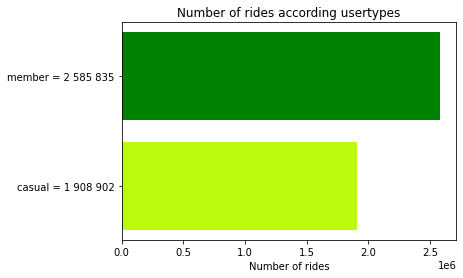

In [36]:
objects = ('casual = 1 908 902', 'member = 2 585 835')
y_pos = np.arange(len(objects))
performance = [1908902,2585835]

plt.barh(y_pos, performance, align='center', color=['#BBF90F', '#008000'])
plt.yticks(y_pos, objects)
plt.xlabel('Number of rides')
plt.title('Number of rides according usertypes')


plt.show()

In [37]:
rn_start_rides = df.groupby('start_station_name')['ride_id'].count().reset_index(name='count_ride_id')
rn_start_rides.head()

,start_station_name,count_ride_id
0,111th St - Morgan Park Metra,3
1,2112 W Peterson Ave,784
2,351,1
3,532 E 43rd St,14
4,63rd & Western Ave - north corner,1


In [38]:
# Top 5 start_station by count of ride_id
rn_start_rides.sort_values(by='count_ride_id', ascending=False)

,start_station_name,count_ride_id
1152,Streeter Dr & Grand Ave,74989
331,DuSable Lake Shore Dr & North Blvd,42366
330,DuSable Lake Shore Dr & Monroe St,40277
728,Michigan Ave & Oak St,40205
1217,Wells St & Concord Ln,38915
...,...,...
583,Lafayette Ave & 87th St - SW,1
585,Laflin St & 51st St,1
588,Lake Park Ave & 44th St,1
1203,Wallace St & 112 St,1


In [39]:
rn_end_rides = df.groupby('end_station_name')['ride_id'].count().reset_index(name='count_ride_id')
rn_end_rides.head()

,end_station_name,count_ride_id
0,10101 S Stony Island Ave,2
1,111th St - Morgan Park Metra,1
2,2112 W Peterson Ave,967
3,532 E 43rd St,13
4,63rd & Western Ave - north corner,4


In [40]:
# Top 5 end_station by count of ride_id
rn_end_rides.sort_values(by='count_ride_id', ascending=False)

,end_station_name,count_ride_id
1165,Streeter Dr & Grand Ave,76367
340,DuSable Lake Shore Dr & North Blvd,46811
741,Michigan Ave & Oak St,41029
339,DuSable Lake Shore Dr & Monroe St,39252
1231,Wells St & Concord Ln,39032
...,...,...
661,Linder Ave & Belmont Ave,1
1070,Sawyer Ave & 111th St,1
695,Marquette Ave & 83rd St,1
933,Public Rack - Laramie Ave & Warwick Ave,1


### The business task: How do annual members and casual riders use Cyclistic bikes differently?
We found out differences of each usertype with analysis of their behaviour during the time periods (year, month, weekday, hour).

#### Number of rides and average ride duration according the usertype / YEAR 
(06/2021-07/2022) 

In [41]:
# Number of Rides and average ride_duration / year
df_pv1 = pd.pivot_table(df,
              index = ['year', 'member_casual'],
              values = ['ride_id','ride_duration'],
              aggfunc = {'ride_id':'count','ride_duration':np.mean})
df_pv1.dropna(inplace=True)
df_pv1

ride_duration  ride_id
year member_casual                        
2021 casual             27.289824   922837
     member             12.298991  1225693
2022 casual             26.103475   986065
     member             12.742927  1360142

In [42]:
# Number of Rides / year
fig_1 = df.groupby('member_casual', as_index=False).count()

px.bar(fig_1, y = 'member_casual', x = 'ride_id', range_x = [0,3000000],
        color = 'member_casual', 
        height = 200,
        text = 'ride_id', 
        labels = {'ride_id': 'Number of rides', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#BBF90F', 'member': '#008000'})

#### Number of rides and average ride duration according the usertype / MONTH 
(06/2021-07/2022)

In [43]:
# Number of Rides and average ride_duration / month
df_pv2 = pd.pivot_table(df,
              index = ['year', 'month', 'member_casual'],
              values = ['ride_id','ride_duration'],
              aggfunc = {'ride_id':'count','ride_duration':np.mean})
df_pv2.dropna(inplace=True)
df_pv2

ride_duration  ride_id
year month     member_casual                        
2021 August    casual             28.541078   335800
               member             13.449363   322997
     September casual             28.056922   288063
               member             13.012039   318469
     October   casual             26.257283   185939
               member             11.915087   278967
     November  casual             22.388652    68699
               member             10.844463   178973
     December  casual             24.753541    44336
               member             10.467982   126287
2022 January   casual             27.361785    12372
               member             10.126731    65051
     February  casual             24.814066    14844
               member             10.562561    71027
     March     casual             28.463812    65919
               member             11.718817   143309
     April     casual             25.953890    90110
               member             11.557180   173452
     May       casual             27.887415   214860
               member             13.284134   271858
     June      casual             25.156266   284669
               member             13.654233   316817
     July      casual             25.271943   303291
               member             13.501293   318628

In [44]:
# Number of Rides / month
import plotly.express as px
fig_2 = df.groupby(['year', 'month', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

px.line(fig_2, x = 'month', y = 'ride_id', range_y = [0,450000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'Number of rides', 'month': 'Months (06/2021-07/2022)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#BBF90F', 'member': '#008000'})


In [45]:
# Average ride duration / month
fig_3 = round(df.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2).dropna()

px.bar(fig_3, x = 'month', y = 'ride_duration',
        color = 'member_casual',
        barmode='group',
        text = 'ride_duration', 
        labels = {'ride_duration': 'Average ride duration (minutes)', 'member_casual': 'Member/Casual', 'month': 'Months (06/2021-07/2022)'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_duration': True}, 
        color_discrete_map = {'casual': '#BBF90F', 'member': '#008000'})

We can see that July, August and September are the months with the most rides. That's logical result because of higher temperatures during these months. We can also see that for both members and casual, the average ride duration remains quite constant over the months. Casual member's average ride duration is about double higher then member's average ride duration.

#### Number of rides and average ride duration according the usertype / WEEKDAY 
(06/2021-07/2022)

In [46]:
# Number of rides and average ride_duration / weekdays
df_pv3 = pd.pivot_table(df,
              index = ['day_of_week', 'member_casual'],
              values = ['ride_id','ride_duration'],
              aggfunc = {'ride_id':'count','ride_duration':np.mean})
df_pv3.dropna(inplace=True)
df_pv3

ride_duration  ride_id
day_of_week member_casual                        
Sunday      casual             30.770022   372749
            member             14.341603   316926
Monday      casual             27.752140   224461
            member             12.136216   364180
Tuesday     casual             23.182261   200356
            member             11.652197   405249
Wednesday   casual             22.779415   206324
            member             11.790643   404224
Thursday    casual             23.392058   232698
            member             11.973800   399955
Friday      casual             24.668303   258338
            member             12.178661   352119
Saturday    casual             29.142569   413976
            member             14.209842   343182

In [53]:
# Number of rides / weekday
fig_4 = df.groupby(['day_of_week', 'member_casual'], as_index=False).count()

px.line(fig_4, x = 'day_of_week', y = 'ride_id', range_y = [0,550000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'day_of_week': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#BBF90F', 'member': '#008000'})

In [48]:
# Average ride duration / weekdays
fig_5 = round(df.groupby(['day_of_week', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_5, x = 'day_of_week', y = 'ride_duration',
        color = 'member_casual',
        barmode='group',
        text = 'ride_duration', 
        labels = {'ride_duration': 'Average ride duration (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_duration': True}, 
        color_discrete_map = {'casual': '#BBF90F', 'member': '#008000'})

The days of the week when there are more rides for casuals are the weekends. For members, there is not much variation throughout the week but Sunday is the day when there are fewer rides. The average ride length increases on weekends for both casuals and members, but the increase is more pronounced for casuals.

#### Number of rides and average ride duration according the usertype / HOURS 
(06/2021-07/2022)

In [50]:
# Number of rides and average ride_duration / hours
df_pv4 = pd.pivot_table(df,
              index = ['hour', 'member_casual'],
              values = ['ride_id','ride_duration'],
              aggfunc = {'ride_id':'count','ride_duration':np.mean})
df_pv4.dropna(inplace=True)
df_pv4

ride_duration  ride_id
hour member_casual                        
0    casual             24.860900    36844
     member             12.390773    25209
1    casual             26.852531    24995
     member             13.269602    15649
2    casual             30.261888    15499
     member             12.739004     8594
3    casual             29.999175     8487
     member             13.123053     5136
4    casual             29.573584     5701
     member             12.416900     6071
5    casual             19.700540     8896
     member             10.144823    26957
6    casual             19.003773    20410
     member             10.995054    74199
7    casual             17.967257    38268
     member             11.379582   140481
8    casual             21.291571    52097
     member             11.129241   164344
9    casual             26.554156    59218
     member             11.559557   112153
10   casual             31.351571    80564
     member             12.535722   104879
11   casual             31.099275   106099
     member             12.793842   126592
12   casual             30.076737   122783
     member             12.448398   144889
13   casual             30.457350   129706
     member             12.696592   141107
14   casual             30.439146   134083
     member             13.074838   139087
15   casual             29.251948   145173
     member             12.987808   166665
16   casual             26.557285   159893
     member             12.971272   226367
17   casual             24.389673   183228
     member             13.174525   279650
18   casual             24.741556   163819
     member             13.107798   225523
19   casual             24.321446   124329
     member             12.936280   158475
20   casual             24.273077    89799
     member             12.742069   108529
21   casual             23.755296    76807
     member             12.381118    82733
22   casual             23.275959    70119
     member             12.350549    61940
23   casual             24.702947    52085
     member             12.552628    40606

In [51]:
# Number of rides / hour
fig_6 = df.groupby(['hour', 'member_casual'], as_index=False).count()

fig_6 = px.line(fig_6, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,300000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'Number of rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#BBF90F', 'member': '#008000'})
fig_6.update_xaxes(dtick=1)
fig_6.show()

Peak hour for both usertypes is in the morning around 9 AM and then around 5 PM. This is more pronounced for members, from which it can be assumed that they use the service for commuting to and from work.

In [54]:
# Average ride duration / hours
fig_7 = round(df.groupby(['hour', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_7, x = 'hour', y = 'ride_duration',
        color = 'member_casual',
        barmode='group',
        text = 'ride_duration', 
        labels = {'ride_duration': 'Average ride duration (minutes)', 'member_casual': 'Member/Casual', 'hour': 'Hours'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_duration': True}, 
        color_discrete_map = {'casual': '#BBF90F', 'member': '#008000'})

#### Distribution of rides among the rideable types

In [55]:
pd.pivot_table(df,
               index = ['rideable_type', 'member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total rides')

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1106081
              member         1858167
docked_bike   casual          222525
              member               0
electric_bike casual          580296
              member          727668
Total rides                  4494737

In [56]:
fig_8 = df.groupby(['rideable_type', 'member_casual'], as_index=False).count()

px.bar(fig_8, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'Number of rides', 'member_casual': 'Member/Casual', 'rideable_type' : 'Rideable type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_duration': False}, 
        color_discrete_map = {'casual': '#BBF90F', 'member': '#008000'})

We also found out that classic bikes are the most used by both casuals and members. The docked bikes are the least used - in the case of the members they are not used at all.

# Share
The Python code was written in Jupyter notebook, which offers many ways how to share it.


# Act
How do annual members and casual riders use Cyclistic bikes differently?¶
Summary of the facts: Total trips: 60 % for members and 40 % for casuals.

The average trip duration for casuals is more than double that for members. The duration of trips for casuals varies a lot throughout the year, but for members it remains practically constant.

Casuals use bikes more on weekends while members use them more consistently throughout the week.

The hot months are when there are more trips, for both casuals and members.

Peak hours for members are 8 am and 5 pm, which suggests they use their bikes to commute.

The most used type of bike is the classic bike for both members and casuals, and the docked bike is practically not used by members.

However, the summary does not include taking into account other factors that may affect the results of the analysis like weather(temperature, humidity, precipitation, wind speed, etc.), gas prices, covid, unemployment, etc. There was a recent article saying that due to increases in the per minute and membership costs, many riders are buying their own bikes or taking the CTA. The CTA has bus and train routes from the outlying areas into the city. For example, for one student, an hour-long commute cost 10 USD with the membership (25 USD without a membership) verse 6 USD for taking CTA. So also the price politcs and competition can affect the marketing strategy.

## Recommendations
Why would casual riders buy Cyclistic annual memberships?
The marketing campaign should be carried out in the warmer months and in the most used stations, in order to reach more casuals. A loyalty program for member could be presented. For example for each 100 km discount x % for each ride. Or invite your friend to join the membership and gain x km free of charge. Many of casuals seems to use the service to commute to work. The campaing should offer first ride as a member for free and explain the advanteges of the membership. Is should be interesting to join the campaign with some charity program. For example for each your km with our service we donate 0,x USD to some charity program.

## Conclusion
This service has a future only if it listens to its users and monitors the development of potential and real competition. In my opinion, they need to simplify the membership system and simply communicate it to users who have used the service so far, but are not members. At the same time, offer a system of discounts, which will, of course, reflect the internal restructuring of costs. The company should work on the so-called green policy and promote cycling as part of sustainability.

In [58]:
conda install nbconvert

Solving environment: done

## Package Plan ##

  environment location: /Users/SonaSolarova/opt/anaconda3

  added / updated specs:
    - nbconvert


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hecd8cb5_0         925 KB
    ------------------------------------------------------------
                                           Total:         925 KB

The following packages will be UPDATED:

  conda                               4.12.0-py39hecd8cb5_0 --> 4.14.0-py39hecd8cb5_0



conda-4.14.0         | 925 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.
